<a href="https://colab.research.google.com/github/ioloi1128/CDA/blob/main/CDA_week6_k_mean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import pandas as pd

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

In [3]:
from sklearn.cluster import KMeans

K-mean basic

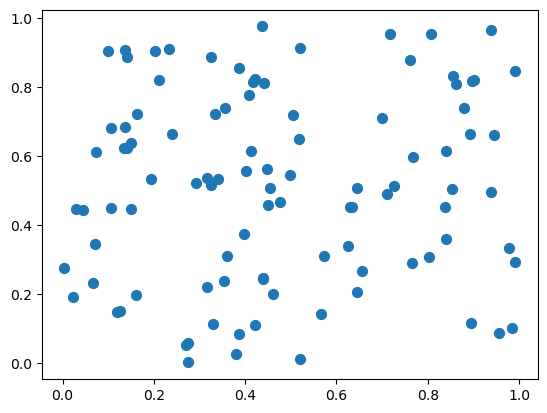

In [4]:
X = np.random.rand(100,2)
plt.scatter(X[:,0],X[:,1],s=50)


In [5]:
#請KMeans分成幾類
km = KMeans(n_clusters=4)

In [6]:
#開始訓練！
km.fit(X)

/Users/wtseng/opt/anaconda3/envs/IPCS_1112_CDA_py310/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [7]:
#取得預測結果
km.labels_

array([3, 1, 2, 3, 2, 3, 2, 2, 0, 3, 1, 2, 2, 0, 2, 2, 0, 2, 1, 1, 0, 0,
       3, 1, 0, 2, 2, 0, 0, 3, 0, 2, 0, 3, 2, 2, 3, 2, 2, 0, 1, 0, 2, 0,
       2, 0, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 3, 3,
       2, 1, 2, 2, 3, 0, 0, 1, 1, 3, 2, 0, 1, 0, 0, 1, 0, 2, 1, 2, 3, 1,
       3, 1, 1, 1, 0, 2, 2, 0, 2, 1, 0, 3], dtype=int32)

In [8]:
# The lowest SSE value
km.inertia_

3.8600049134022685

In [9]:
# Final locations of the centroid
km.cluster_centers_

array([[0.25071217, 0.21590705],
       [0.77379657, 0.3340647 ],
       [0.31172911, 0.70005275],
       [0.85039844, 0.79029705]])

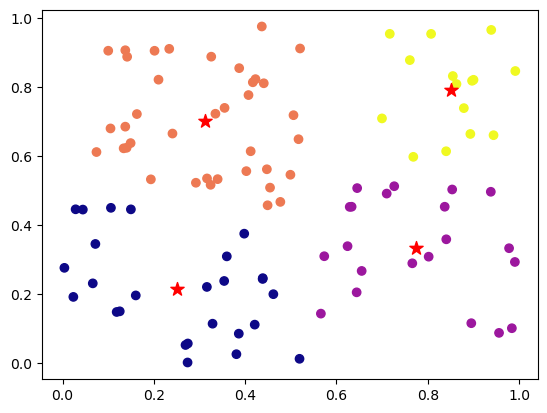

In [10]:
#plotting
plt.scatter(X[:,0],X[:,1], c=km.labels_,cmap='plasma')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], 
           marker="*", c="r", s=100, label="centroids")

In [11]:
from collections import Counter
Counter(km.labels_)

Counter({3: 15, 1: 21, 2: 38, 0: 26})

In [15]:
!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.6/282.6 kB 494.4 kB/s eta 0:00:00a 0:00:01


/Users/wtseng/opt/anaconda3/envs/IPCS_1112_CDA_py310/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/wtseng/opt/anaconda3/envs/IPCS_1112_CDA_py310/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/wtseng/opt/anaconda3/envs/IPCS_1112_CDA_py310/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/wtseng/opt/anaconda3/envs/IPCS_1112_CDA_py310/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from

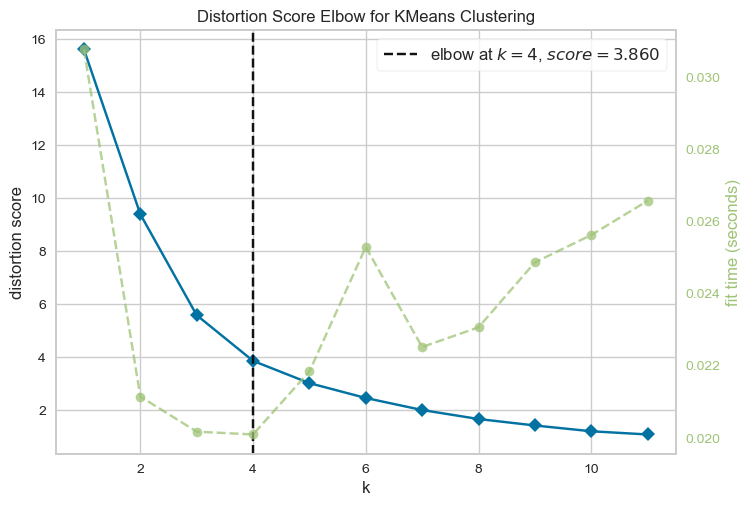

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [16]:
visualizer = KElbowVisualizer(km, k=(1,12)).fit(X)
visualizer.show()

The application of climate data

In [17]:
url = 'http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/noaa.ersst.v5/sst.mnmean.nc'
ds = xr.open_dataset(url)


# select period
ds = ds.sel(time=slice('1960', '2020'))


#actually load the data
ds.load()

<xarray.Dataset>
Dimensions:    (lat: 89, lon: 180, time: 732, nbnds: 2)
Coordinates:
  * lat        (lat) float32 88.0 86.0 84.0 82.0 ... -82.0 -84.0 -86.0 -88.0
  * lon        (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
  * time       (time) datetime64[ns] 1960-01-01 1960-02-01 ... 2020-12-01
Dimensions without coordinates: nbnds
Data variables:
    time_bnds  (time, nbnds) float64 9.969e+36 9.969e+36 ... 9.969e+36 9.969e+36
    sst        (time, lat, lon) float32 -1.8 -1.8 -1.8 -1.8 ... nan nan nan nan
Attributes: (12/39)
    climatology:                     Climatology is based on 1971-2000 SST, X...
    description:                     In situ data: ICOADS2.5 before 2007 and ...
    keywords_vocabulary:             NASA Global Change Master Directory (GCM...
    keywords:                        Earth Science > Oceans > Ocean Temperatu...
    instrument:                      Conventional thermometers
    source_comment:                  SSTs were observed by conventional therm...
    ...                              ...
    comment:                         SSTs were observed by conventional therm...
    summary:                         ERSST.v5 is developed based on v4 after ...
    dataset_title:                   NOAA Extended Reconstructed SST V5
    _NCProperties:                   version=2,netcdf=4.6.3,hdf5=1.10.5
    data_modified:                   2023-04-04
    DODS_EXTRA.Unlimited_Dimension:  time

In [18]:
#make anomaly
sst_clim = ds.sst.groupby('time.month').mean(dim='time')
sst_anom = ds.sst.groupby('time.month') - sst_clim


In [19]:
#detrend
from scipy.signal import detrend
sst_anom_detrended = xr.apply_ufunc(detrend, sst_anom.fillna(0),
                                    kwargs={'axis': 0}).where(~sst_anom.isnull())

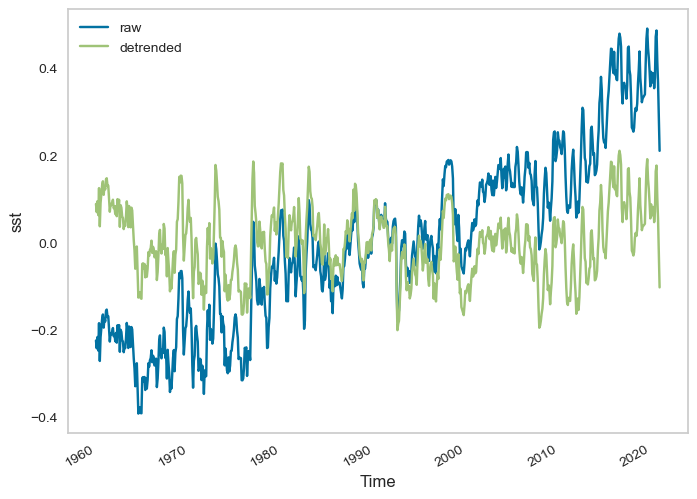

In [20]:
sst_anom.mean(dim=['lon', 'lat']).plot(label='raw')
sst_anom_detrended.mean(dim=['lon', 'lat']).plot(label='detrended')
plt.grid()
plt.legend()

In [21]:
ds_raw=sst_anom.mean(dim=['lon', 'lat'])
ds_detrend=sst_anom_detrended.mean(dim=['lon', 'lat'])

xtime=sst_anom['time']
nt=len(xtime)
xts=np.arange(0, nt, 1)
ds_raw

<xarray.DataArray 'sst' (time: 732)>
array([-2.24409580e-01, -2.42298588e-01, -2.16344059e-01, -2.47331142e-01,
       -1.84645519e-01, -2.71243602e-01, -2.16660157e-01, -1.94516748e-01,
       -1.74407989e-01, -1.64716750e-01, -1.94846928e-01, -1.74885020e-01,
       -1.80657431e-01, -1.56256691e-01, -1.53432146e-01, -1.70437187e-01,
       -1.68780625e-01, -1.97083071e-01, -2.26792336e-01, -2.07946628e-01,
       -2.09983706e-01, -2.03688011e-01, -1.95821404e-01, -2.14361161e-01,
       -2.10269973e-01, -2.26103008e-01, -2.06876338e-01, -2.29313970e-01,
       -1.89333633e-01, -2.10955501e-01, -1.89078033e-01, -2.50221044e-01,
       -1.99809834e-01, -2.04868183e-01, -2.23729402e-01, -2.26551384e-01,
       -2.51156539e-01, -2.38733962e-01, -2.41838604e-01, -2.19220579e-01,
       -1.84088424e-01, -2.01111212e-01, -2.41530806e-01, -1.92326203e-01,
       -2.31833234e-01, -2.39369616e-01, -1.93503946e-01, -1.98824301e-01,
       -2.33404353e-01, -2.65594214e-01, -2.88016140e-01, -3.29185247e-01,
       -3.03883523e-01, -2.76473850e-01, -3.32000762e-01, -3.91828269e-01,
       -3.80047858e-01, -3.77475679e-01, -3.90760988e-01, -3.91114622e-01,
       -3.10461372e-01, -3.08150142e-01, -3.18823278e-01, -3.07974428e-01,
       -3.37790281e-01, -3.11166108e-01, -3.34719062e-01, -3.15477043e-01,
       -2.76608318e-01, -2.84166843e-01, -2.69584119e-01, -2.64822692e-01,
       -2.46802002e-01, -2.74150848e-01, -2.59079278e-01, -2.63432592e-01,
       -2.81620085e-01, -2.76166826e-01, -2.65948415e-01, -3.31127822e-01,
...
        3.50939363e-01,  2.77713865e-01,  2.39771217e-01,  2.29747042e-01,
        2.30482653e-01,  2.16975421e-01,  2.50400215e-01,  2.89661944e-01,
        3.27539504e-01,  3.47709894e-01,  3.80688637e-01,  4.10689056e-01,
        4.44420636e-01,  4.43731993e-01,  4.06604439e-01,  3.88743460e-01,
        4.37288642e-01,  3.85421693e-01,  3.94434988e-01,  3.74459237e-01,
        3.72200191e-01,  4.33451742e-01,  4.67310131e-01,  4.78949249e-01,
        4.69936579e-01,  4.49019015e-01,  3.49870980e-01,  3.18933457e-01,
        3.62260371e-01,  3.66297603e-01,  3.58876199e-01,  3.54560047e-01,
        3.29826862e-01,  3.60141248e-01,  4.46509123e-01,  4.49391693e-01,
        3.95704716e-01,  3.83563131e-01,  3.31541002e-01,  2.63718784e-01,
        2.60145247e-01,  2.54341930e-01,  2.63286859e-01,  2.96775341e-01,
        3.08491945e-01,  3.02630663e-01,  3.18407536e-01,  3.64980400e-01,
        3.97091120e-01,  4.38134938e-01,  3.77211809e-01,  3.53434741e-01,
        3.21725577e-01,  3.30406517e-01,  3.33467185e-01,  3.37047100e-01,
        3.39803576e-01,  4.10906106e-01,  4.67224687e-01,  4.90527391e-01,
        4.45940405e-01,  4.24517363e-01,  3.94186050e-01,  3.58141810e-01,
        3.91344965e-01,  3.66664529e-01,  3.77533317e-01,  3.87927502e-01,
        3.53873461e-01,  3.78786594e-01,  4.71776992e-01,  4.86141711e-01,
        4.14439589e-01,  3.65402579e-01,  2.83588618e-01,  2.10370749e-01],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1960-01-01 1960-02-01 ... 2020-12-01
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

In [46]:
import numpy as np

#comX=[xts,ds_detrend]
comX=[ds_raw,ds_detrend]
X1=np.transpose(comX)


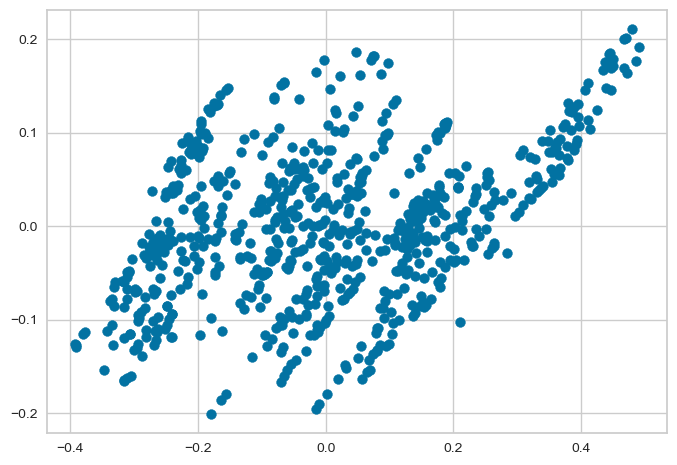

In [47]:
plt.scatter(X1[:,0],X1[:,1],s=50)

In [48]:
km1 = KMeans(3)
km1.fit(X1)

/Users/wtseng/opt/anaconda3/envs/IPCS_1112_CDA_py310/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

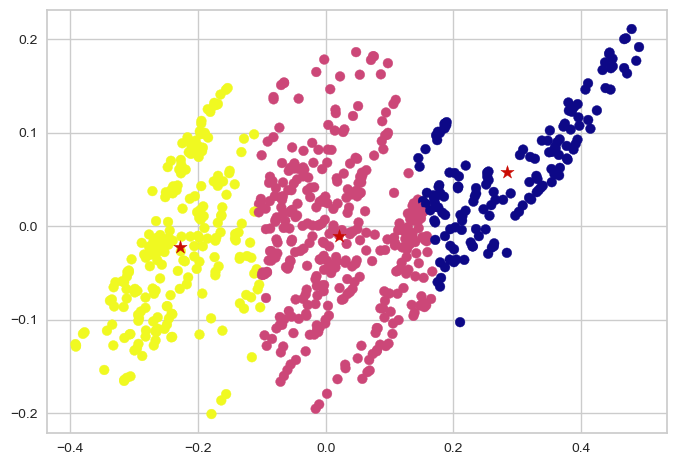

In [49]:
#plotting
plt.scatter(X1[:,0],X1[:,1], c=km1.labels_,cmap='plasma')
plt.scatter(km1.cluster_centers_[:,0], km1.cluster_centers_[:,1], 
           marker="*", c="r", s=100, label="centroids")

The application of map

In [25]:
#read precipitation
url = 'http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/gpcp/precip.mon.mean.nc'
ds_prec = xr.open_dataset(url)
ds_prec = ds_prec.sel(time=slice('1979', '2019'))
ds_prec.load()
ds_prec

<xarray.Dataset>
Dimensions:    (lat: 72, lon: 144, time: 492, nv: 2)
Coordinates:
  * lat        (lat) float32 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
  * lon        (lon) float32 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2019-12-01
Dimensions without coordinates: nv
Data variables:
    time_bnds  (time, nv) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-01-01
    lat_bnds   (lat, nv) float32 -90.0 -87.5 -87.5 -85.0 ... 85.0 87.5 87.5 90.0
    lon_bnds   (lon, nv) float32 0.0 2.5 2.5 5.0 5.0 ... 355.0 357.5 357.5 360.0
    precip     (time, lat, lon) float32 0.0 0.0 0.0 0.0 ... 0.1305 0.1327 0.1341
Attributes: (12/20)
    Conventions:                     CF-1.0
    curator:                         Dr. Jian-Jian Wang\nESSIC, University of...
    citation:                        Adler, R.F., G.J. Huffman, A. Chang, R. ...
    title:                           GPCP Version 2.3 Combined Precipitation ...
    platform:                        NOAA POES (Polar Orbiting Environmental ...
    source_obs:                      CDR RSS SSMI/SSMIS Tbs over ocean \nCDR ...
    ...                              ...
    NCO:                             4.6.9
    history:                         Generated at NOAA/ESRL PSD Sep 9 2016 ba...
    References:                      http://www.psl.noaa.gov/data/gridded/dat...
    _NCProperties:                   version=2,netcdf=4.7.3,hdf5=1.10.6,
    data_comment:                    Interim data covers 2023/02 through latest.
    DODS_EXTRA.Unlimited_Dimension:  time

In [26]:
ds_climo=ds_prec.groupby('time.month').mean()
ds_anoms=ds_prec.groupby('time.month')-ds_climo
ds_anoms

<xarray.Dataset>
Dimensions:   (lat: 72, lon: 144, time: 492, nv: 2)
Coordinates:
  * lat       (lat) float32 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
  * lon       (lon) float32 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
  * time      (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2019-12-01
    month     (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: nv
Data variables:
    lat_bnds  (time, lat, nv) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    lon_bnds  (time, lon, nv) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    precip    (time, lat, lon) float32 -0.02191 -0.03154 ... -0.2816 -0.2292

In [30]:
#select domain
latS=-30
latN=30
lonL=100
lonR=300
ds_anoms_TP = ds_anoms.sel(lat=slice(latS, latN), lon=slice(lonL, lonR))

nt = len(ds_anoms_TP['time'])
ny = len(ds_anoms_TP['lat'])
nx = len(ds_anoms_TP['lon'])
print(nt, ny, nx)
data = ds_anoms_TP['precip'].values
ds_anoms_2d = np.reshape(data, [nt, ny*nx],order='F')
mk2 = KMeans(n_clusters=4).fit(ds_anoms_2d)

492 24 80


/Users/wtseng/opt/anaconda3/envs/IPCS_1112_CDA_py310/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [28]:
def get_cluster_fraction(m, label):        
        return (m.labels_==label).sum()/(m.labels_.size*1.0)

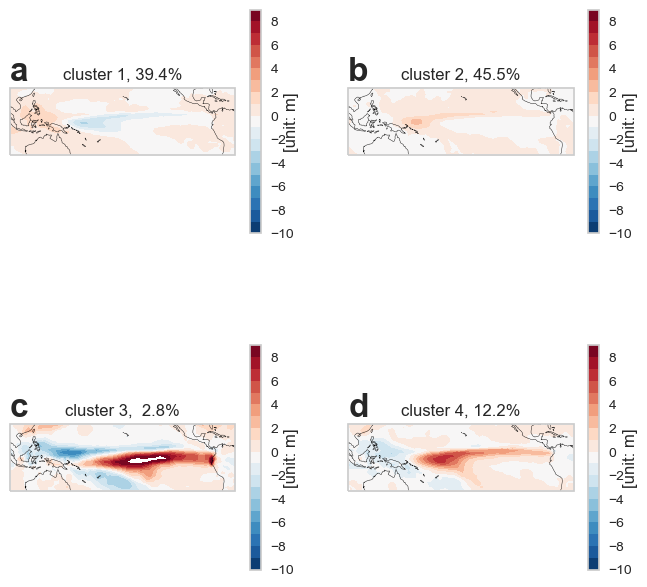

In [29]:
x,y = np.meshgrid(ds_anoms_TP.lon, ds_anoms_TP.lat)
proj = ccrs.PlateCarree(central_longitude=180)
fig, axes = plt.subplots(2,2, figsize=(8,8), subplot_kw=dict(projection=proj))
regimes = ['cluster 1', 'cluster 2', 'cluster 3', 'cluster 4']
tags = list('abcd')
for i in range(mk2.n_clusters):
    onecen = mk2.cluster_centers_[i,:].reshape(ny,nx, order='F')
    cs = axes.flat[i].contourf(x, y, onecen,
                               levels=np.arange(-10, 10, 1), 
                               transform=ccrs.PlateCarree(),
                               cmap='RdBu_r')
    
    cb=fig.colorbar(cs, ax=axes.flat[i], shrink=0.8, aspect=20) 
    cb.set_label('[unit: m]',labelpad=-7)    
    axes.flat[i].coastlines()
    axes.flat[i].set_global()
    axes.flat[i].set_extent([lonL, lonR, latS, latN],crs=ccrs.PlateCarree())

    title = '{}, {:4.1f}%'.format(regimes[i], get_cluster_fraction(mk2, i)*100)
    axes.flat[i].set_title(title)
    plt.text(0, 1, tags[i], 
             transform=axes.flat[i].transAxes, 
             va='bottom', 
             fontsize=plt.rcParams['font.size']*2, 
             fontweight='bold')